In [67]:
from pyspatialml import Raster
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contextily
import geopandas
from scipy.interpolate import griddata
import rasterio
from copy import deepcopy

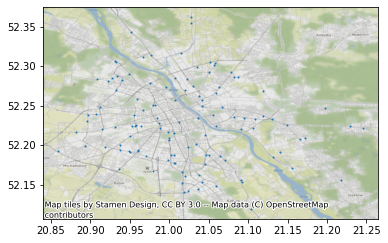

In [58]:
pop_df_warsaw = pd.read_csv("pop_df_warsaw.csv")
df = pd.read_csv("dane.csv")
pop_df_warsaw = geopandas.GeoDataFrame(pop_df_warsaw, geometry=geopandas.points_from_xy(pop_df_warsaw.SHAPE_Leng, pop_df_warsaw.SHAPE_Area), crs='epsg:3035')
stacje = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.x, df.y), crs='epsg:4326')
ax = stacje.plot(markersize=1)
contextily.add_basemap(ax, crs=stacje.crs.to_string())
plt.show()

In [98]:
pop_grid = geopandas.read_file(r'/Users/alubis/Desktop/OneDrive/mag/PD_STAT_GRID_CELL_2011.shp')
pop_grid = pop_grid.to_crs(epsg=4326)

districts = geopandas.read_file(r'/Users/alubis/Desktop/OneDrive/mag/dzielnice_Warszawy')
districts = districts.to_crs(epsg=4326)
combined = geopandas.overlay(pop_grid, districts, how='intersection')
joined = geopandas.sjoin(stacje, combined, op='within')

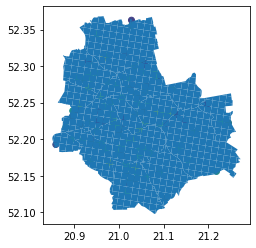

In [114]:
ax = joined.plot(column='wielkosc ruchu')
combined.plot(ax=ax)
plt.show()